This notebook focuses on collecting and reading the education data sets for the project.  
It uses two data sources: EdGap data and NCES school data.

Import libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Load Dataset

In [6]:
edgap = pd.read_excel('../data/EdGap_data.xlsx', dtype = {'NCESSCH School ID': str})
school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')

/opt/anaconda3/lib/python3.13/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/var/folders/wx/0m6_v4n9285892l822ksy8740000gn/T/ipykernel_71073/873381922.py:2: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_information = pd.read_csv('../data/ccd_sch_029_1617_w_1a_11212017.csv', encoding='unicode_escape')


# Ethic Considerations

This project uses publicly accessible datasets that don't include any personally identifying information (PII).  
ACT scores and socioeconomic indicators from EdGap.org and the National Center for Education Statistics (NCES) are two examples of data sources.  
The data are aggregated at the census-tract or school level, so informed consent is not necessary.  
By restricting access to sensitive data and making sure that results are reported responsibly, we are dedicated to using the data in an ethical manner.

Inspect data

In [7]:
edgap.head()


,NCESSCH School ID,CT Unemployment Rate,CT Pct Adults with College Degree,CT Pct Childre In Married Couple Family,CT Median Household Income,School ACT average (or equivalent if SAT score),School Pct Free and Reduced Lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


In [8]:
school_information.head()


,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,...,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,...,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [9]:
pd.set_option('display.max_columns', None)

school_information.head()

,SCHOOL_YEAR,FIPST,STATENAME,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,UNION,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,MSTREET1,MSTREET2,MSTREET3,MCITY,MSTATE,MZIP,MZIP4,LSTREET1,LSTREET2,LSTREET3,LCITY,LSTATE,LZIP,LZIP4,PHONE,WEBSITE,SY_STATUS,SY_STATUS_TEXT,UPDATED_STATUS,UPDATED_STATUS_TEXT,EFFECTIVE_DATE,SCH_TYPE_TEXT,SCH_TYPE,RECON_STATUS,OUT_OF_STATE_FLAG,CHARTER_TEXT,CHARTAUTH1,CHARTAUTHN1,CHARTAUTH2,CHARTAUTHN2,NOGRADES,G_PK_OFFERED,G_KG_OFFERED,G_1_OFFERED,G_2_OFFERED,G_3_OFFERED,G_4_OFFERED,G_5_OFFERED,G_6_OFFERED,G_7_OFFERED,G_8_OFFERED,G_9_OFFERED,G_10_OFFERED,G_11_OFFERED,G_12_OFFERED,G_13_OFFERED,G_UG_OFFERED,G_AE_OFFERED,GSLO,GSHI,LEVEL,IGOFFERED
0,2016-2017,1,ALABAMA,AL,Sequoyah Sch - Chalkville Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0020,1.000020e+10,100277.0,P O Box 9486,NaN,NaN,Birmingham,AL,35220,NaN,1000 Industrial School Road,NaN,NaN,Birmingham,AL,35220,NaN,(205)680-8574,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
1,2016-2017,1,ALABAMA,AL,Camps,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0050,1.000020e+10,101667.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,1601 County Rd. 57,NaN,NaN,Prattville,AL,36067,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
2,2016-2017,1,ALABAMA,AL,Det Ctr,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0060,1.000020e+10,101670.0,P O Box 66,NaN,NaN,Mt Meigs,AL,36057,NaN,2109 Bashi Rd Bldg 509,NaN,NaN,Thomasville,AL,36784,NaN,(334)215-3850,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
3,2016-2017,1,ALABAMA,AL,Wallace Sch - Mt Meigs Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0030,1.000020e+10,101705.0,P O Box 66,NaN,NaN,Mount Meigs,AL,36057,NaN,1000 Industrial School Road,NaN,NaN,Mount Meigs,AL,36057,NaN,(334)215-6039,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported
4,2016-2017,1,ALABAMA,AL,McNeel Sch - Vacca Campus,Alabama Youth Services,1,NaN,AL-210,100002,AL-210-0040,1.000020e+10,101706.0,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,8950 Roebuck Blvd,NaN,NaN,Birmingham,AL,35206,NaN,(205)838-4981,http://www.dys.alabama.gov,1,Open,1,Open,03/03/2010,Alternative School,4,No,No,No,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,07,12,High,As reported


In [10]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


In [11]:
school_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

##### Summary

1, The school information data set is much larger than the Edgap data set. Clearly the EdGap data set does not include all schools.

2, There are missing values in each data set.

3, Each data set is in a tidy, or long format.

4, The data types for the variables of interest look correct, but the school indentifier is an object in the EdGap data set and a float64 in the school information data set.

Are the data suitable for answering the question?

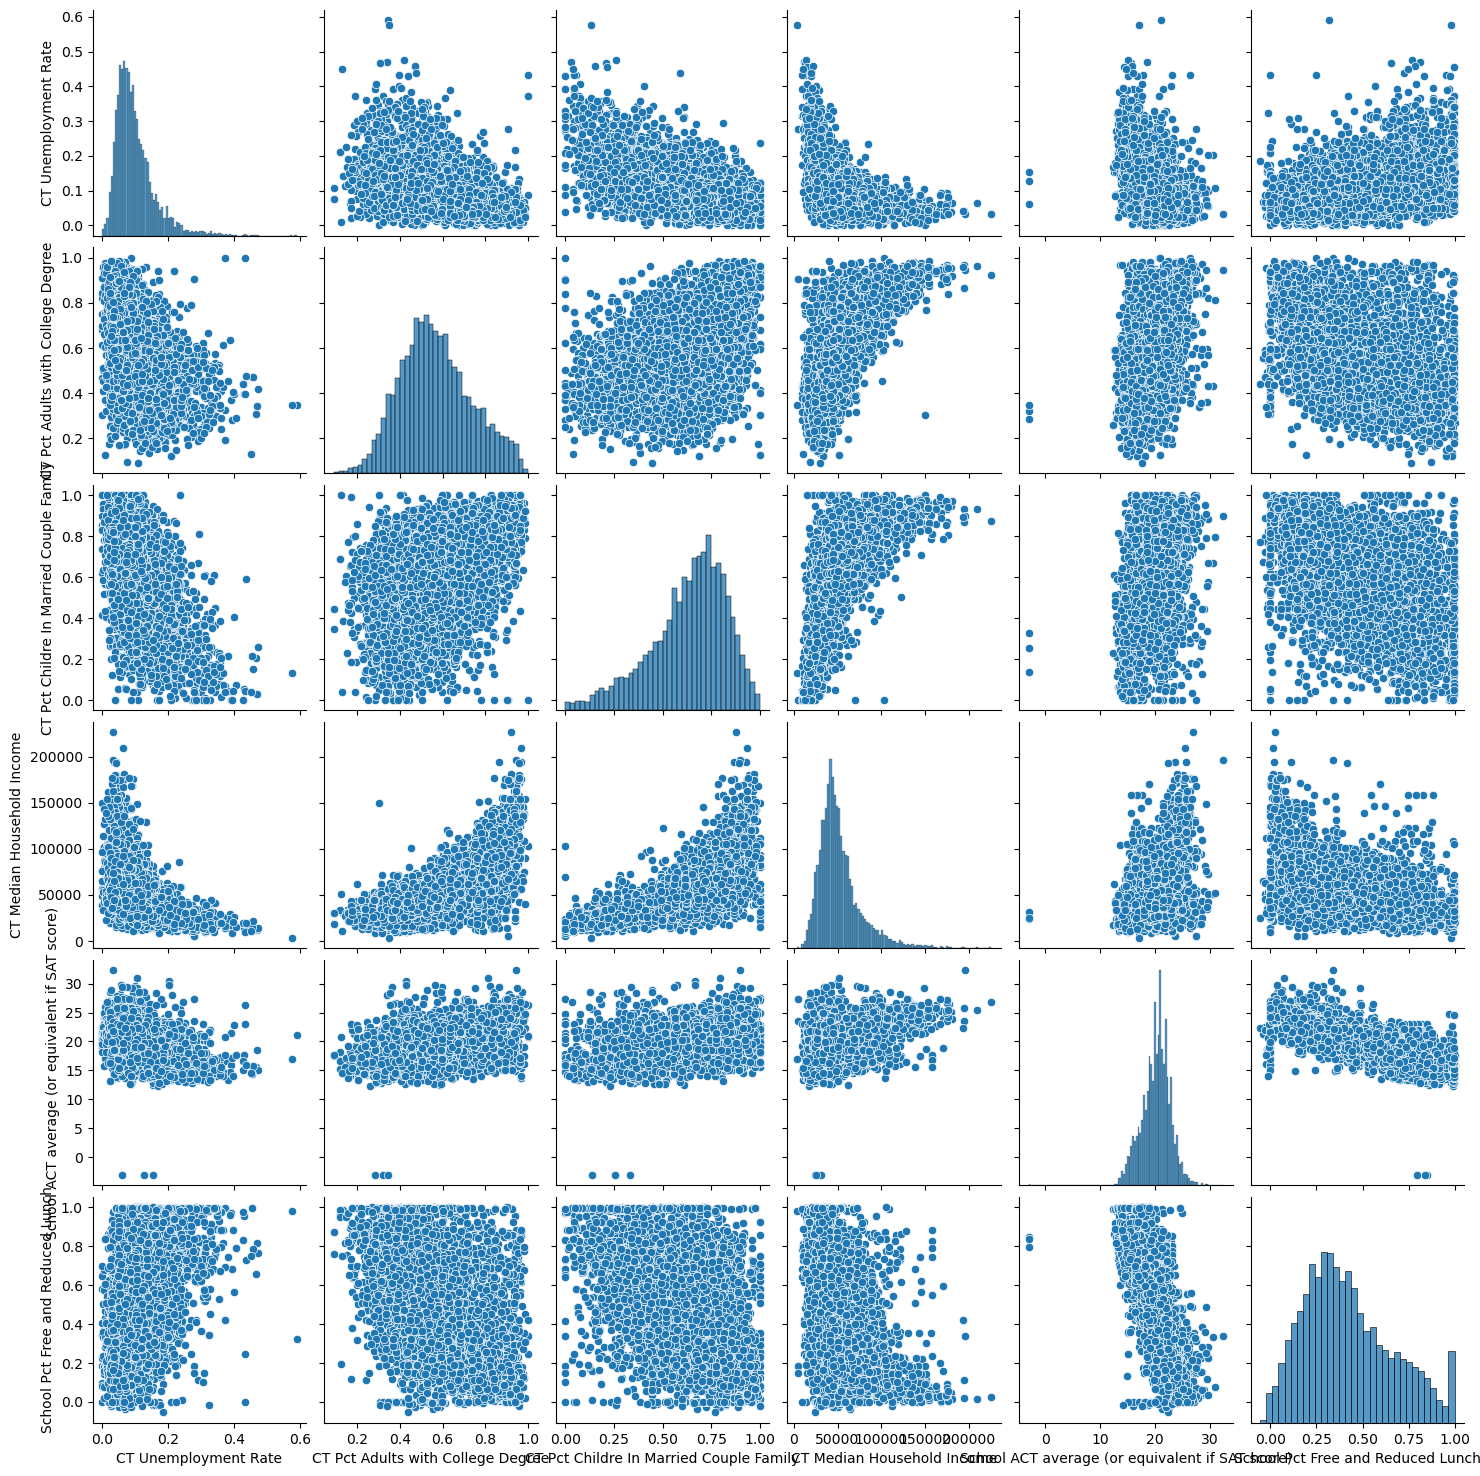

In [12]:
sns.pairplot(
    edgap.drop(columns=['NCESSCH School ID'])
)

plt.show()

Add regression lines and format the pair plot

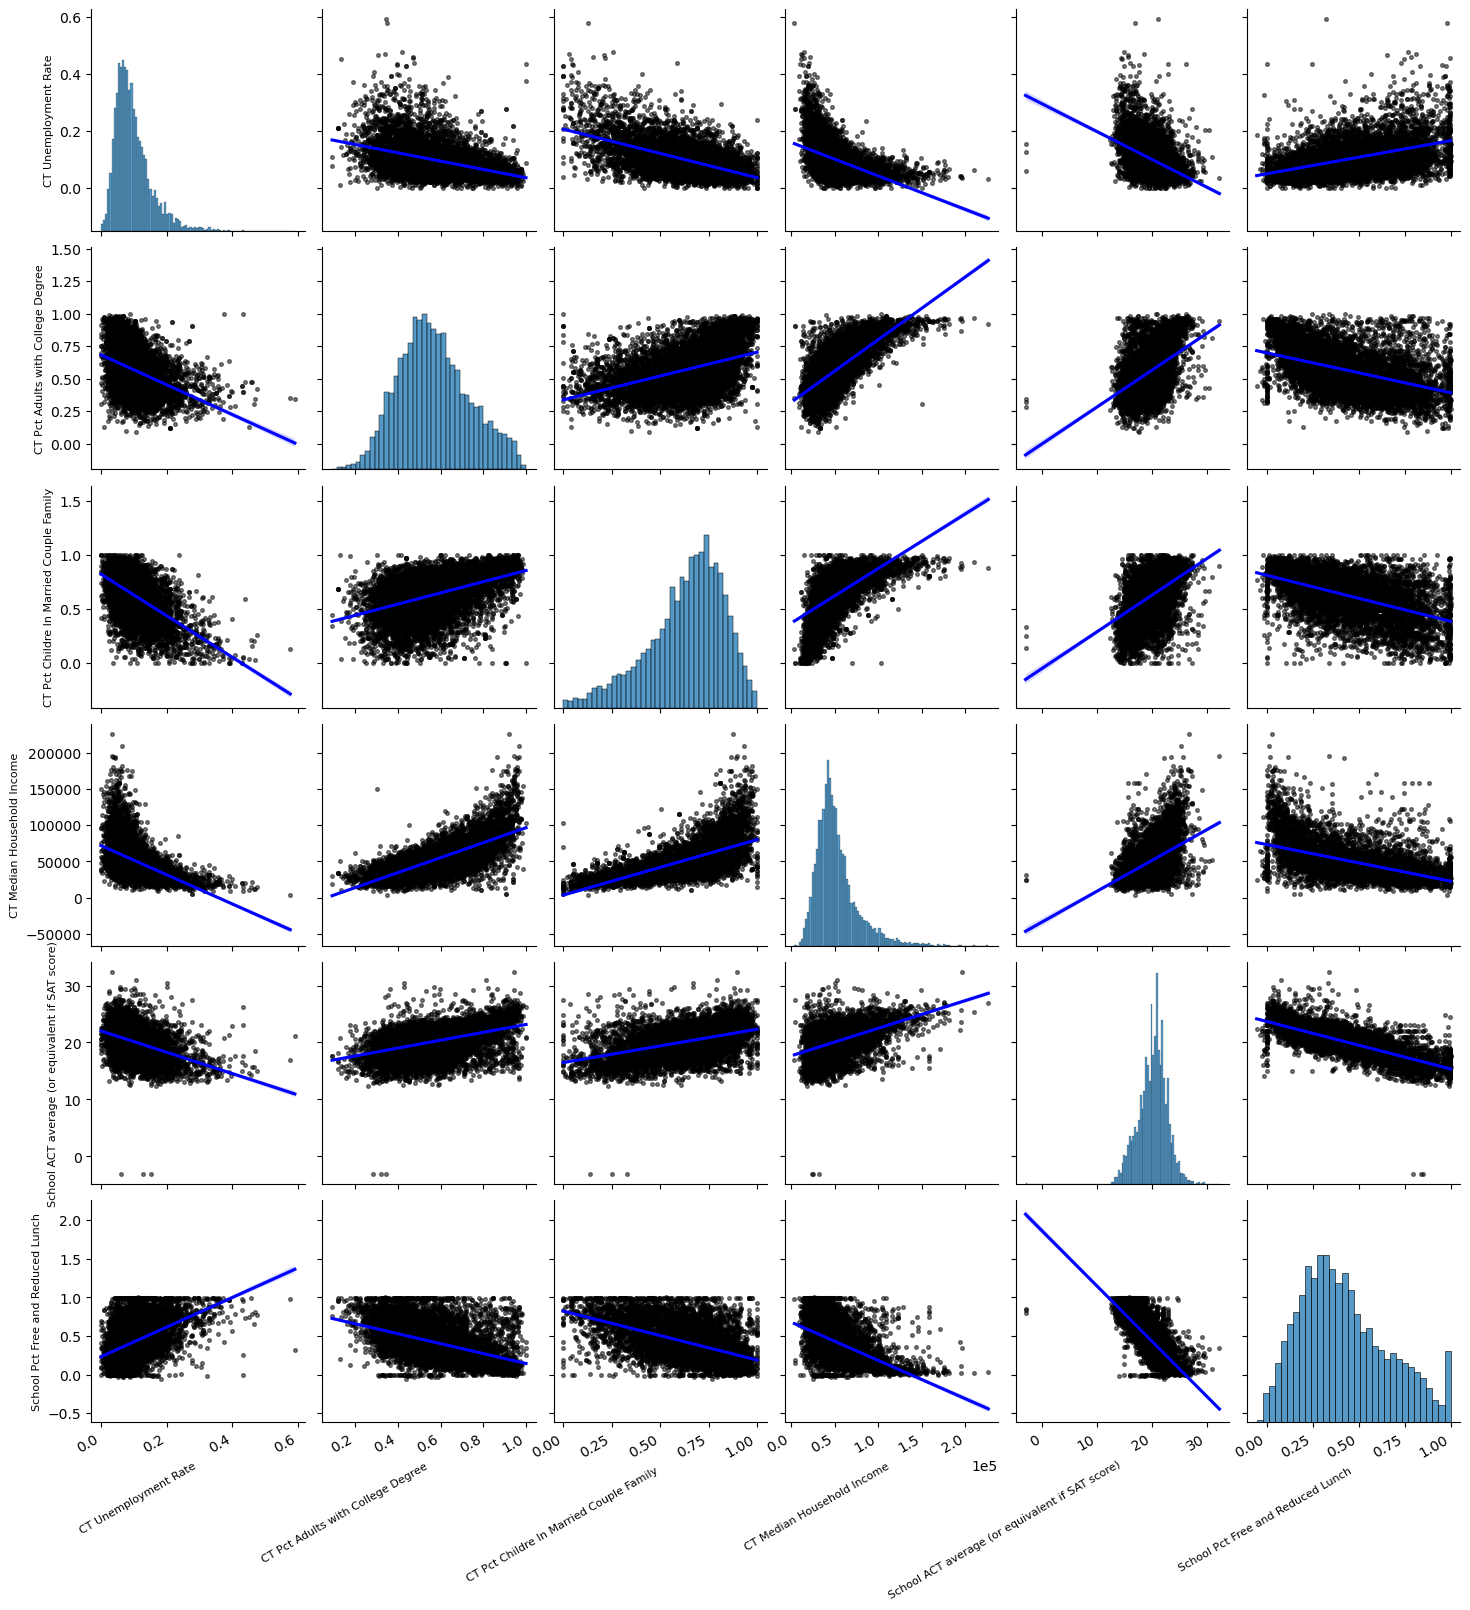

In [13]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID'),
    kind = 'reg',
    plot_kws = {
        'line_kws': {'color': 'blue'},
        'scatter_kws': {'alpha' : 0.5, 'color': 'k', 's' : 7},       
        }
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income' :
        ax.ticklabel_format(style='sci', axis= 'x', scilimits=(0,0)) #Apply scientific notation 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation= 30, ha = 'right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size
        
    plt.setp(ax.get_xticklabels(), rotation= 30, ha='right')
    
plt.show()

Plot a single row

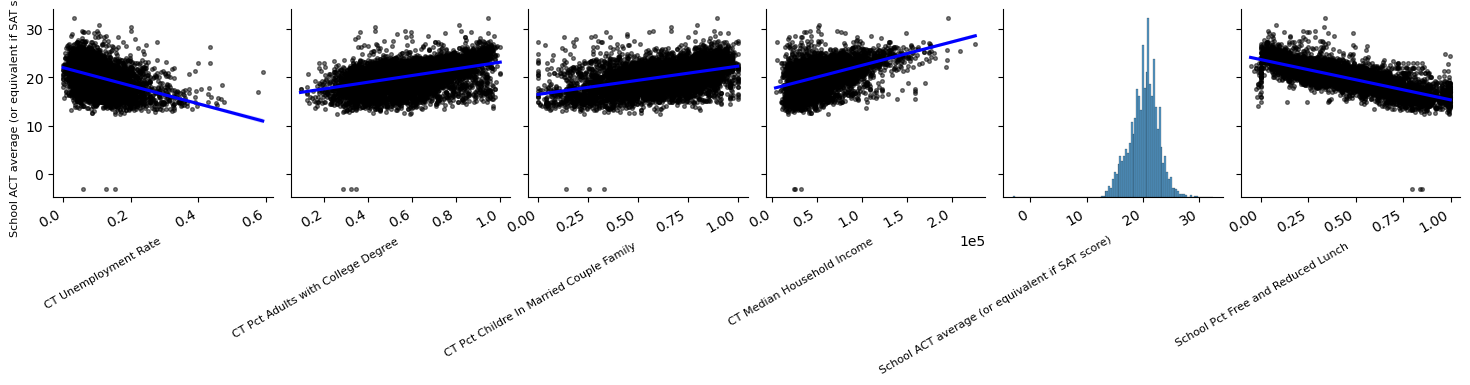

In [14]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID'),
    y_vars = ['School ACT average (or equivalent if SAT score)'],
    kind = 'reg',
    plot_kws = {
        'line_kws': {'color': 'blue'},
        'scatter_kws': {'alpha' : 0.5, 'color': 'k', 's' : 7},       
        }
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income' :
        ax.ticklabel_format(style='sci', axis= 'x', scilimits=(0,0)) #Apply scientific notation 
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation= 30, ha = 'right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size
        
    plt.setp(ax.get_xticklabels(), rotation= 30, ha='right')
    
plt.show()

##### Summary

1, There appears to be a relationship between the socioeconomic variables and the ACT score.

2, There are some out-of-range ACT and percent lunch values that will need to be dealt with

3, We should have confidence that it is worthwhile to spend time preparing the data analysis.

Select relevant subsets of the data

In [15]:
school_information = school_information [
    ['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT',]
]


Rename Columns|

In [16]:
edgap = edgap.rename(
    columns={
        'NCESSCH School ID': 'id',
        'CT Pct Adult with College Degree': 'percent_collage',
        'CT Unemployent Rate': 'rate_unemployment',
        'CT Pct Childre In Married Couple Family': 'percent_married',
        'CT Median Household Income': 'median_income',
        'School ACT average (or equivalent if SAT score)': 'act_average',
        'School Pct Free and Reduced Lunch': 'percent_lunch'
    }
)

In [17]:
school_information = school_information.rename(columns={
    'SCHOOL_YEAR': 'school_year',
    'NCESSCH': 'id',
    'LSTATE': 'state',
    'LZIP': 'zip_code',
    'SCH_TYPE_TEXT': 'school_type',
    'LEVEL': 'school_level',
    'CHARTER_TEXT': 'charter'
})

In [18]:
edgap.head()

,id,CT Unemployment Rate,CT Pct Adults with College Degree,percent_married,median_income,act_average,percent_lunch
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641


1, We selected a subset of columns of the school infomation data set.

2, We renamed the columns for clarity and to follow formatting guidelines.

3, We are ready to join the data frames.

##### Join the data frames

In [19]:
school_information['id'] = school_information['id'].astype(float).astype('Int64').astype(str)


In [20]:
school_information.head()

,school_year,id,state,zip_code,school_type,school_level,charter
0,2016-2017,10000200277,AL,35220,Alternative School,High,No
1,2016-2017,10000201667,AL,36067,Alternative School,High,No
2,2016-2017,10000201670,AL,36784,Alternative School,High,No
3,2016-2017,10000201705,AL,36057,Alternative School,High,No
4,2016-2017,10000201706,AL,35206,Alternative School,High,No


In [21]:
df = edgap.merge(
    school_information,
    how = 'left',
    on = 'id'
)

df.head()

,id,CT Unemployment Rate,CT Pct Adults with College Degree,percent_married,median_income,act_average,percent_lunch,school_year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


#### Summary 
1, We joined the data sets using the school id as the key

2, We first cast the id as an object to have the same data type for the key each data set

3, We used a left join to keep all EdGap data.

Quality Control

In [22]:
df.describe()

,CT Unemployment Rate,CT Pct Adults with College Degree,percent_married,median_income,act_average,percent_lunch
count,7972.000000,7973.000000,7961.000000,7966.000000,7986.000000,7986.000000
mean,0.098730,0.568930,0.633440,52026.905222,20.181532,0.420651
std,0.058959,0.165704,0.196764,24228.057079,2.595201,0.239754
min,0.000000,0.091493,0.000000,3589.000000,-3.070818,-0.054545
25%,0.058655,0.450828,0.523810,36597.250000,18.600000,0.238501
50%,0.085649,0.554979,0.667594,46833.500000,20.400000,0.381570
75%,0.123376,0.676571,0.777135,61369.250000,21.910867,0.575447
max,0.590278,1.000000,1.000000,226181.000000,32.362637,0.998729


or use the min and max

In [23]:
df.select_dtypes(include=['number']).agg(['min', 'max']).round(2)

,CT Unemployment Rate,CT Pct Adults with College Degree,percent_married,median_income,act_average,percent_lunch
min,0.00,0.09,0.0,3589.0,-3.07,-0.05
max,0.59,1.00,1.0,226181.0,32.36,1.00


Set out-of-range values to NaN using np.nan.

In [24]:
df.loc[df['percent_lunch'] < 0, 'percent_lunch'] = np.nan

In [25]:
df.loc[df['act_average'] < 1, 'act_average'] = np.nan

In [26]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [27]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [28]:
df = df.loc[df['school_level'] == 'High']

In [29]:
df.duplicated().sum()

np.int64(0)

##### Identify missing values

In [30]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
CT Unemployment Rate,12
CT Pct Adults with College Degree,11
percent_married,20
median_income,16
act_average,3
percent_lunch,20
school_year,0
state,0
zip_code,0


In [31]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name = 'Percent Missing Values')

,Percent Missing Values
id,0.00
CT Unemployment Rate,0.17
CT Pct Adults with College Degree,0.15
percent_married,0.28
median_income,0.22
act_average,0.04
percent_lunch,0.28
school_year,0.00
state,0.00
zip_code,0.00


What states do we have data from?

In [32]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [33]:
df['state'].nunique()

20

Plot the results on a map

In [34]:
import plotly.offline as po
import plotly.graph_objects as pg

In [35]:
layout = dict(
    geo = {"scope" : "usa"}, coloraxis_colorbar = dict(title = "Number of Schools")
)

data = dict(
    type = 'choropleth',
    locations = df['state'].value_counts().index,
    locationmode = 'USA-states',
    z = df['state'].value_counts().values,
    coloraxis = 'coloraxis',
)

x = pg.Figure(data = [data], layout = layout)
po.iplot(x)

We are missing a large amount of USA data due to omission. This is not evident by examining NaN values in the data set.

In [36]:
df = df.dropna(subset=['act_average'])

In [37]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
CT Unemployment Rate,12
CT Pct Adults with College Degree,11
percent_married,20
median_income,16
act_average,0
percent_lunch,20
school_year,0
state,0
zip_code,0


If we drop rows that have NaNs for any socioeconomic variables, then we will negatively affect our analysis using the variables where data were present. So, we will not drop the rows in this data set that are missing the socioeconomic variables. We will impute the missing values.

##### Summary
1, We set out-of-range values to NaN and will impute them.

2, We kept only high schools.

3, We removed schools where we do not have the ACT score.

4, Many schools are missing from the data by omission.

5, We will impute missing values of socioeconomic variables

## Data imputation

In [38]:
df = df.rename(columns={
    'CT Unemployment Rate': 'rate_unemployment',
    'CT Pct Adults with College Degree': 'percent_collage',
    'percent_married': 'percent_married',
    'median_income': 'median_income',
    'percent_lunch': 'percent_lunch',
    'state': 'state'
})


predictor_variables = [
    'rate_unemployment',
    'percent_collage',
    'percent_married',
    'median_income',
    'percent_lunch',
    'state'
    #'charter'
]


Use the iterative imputer to replace missing values in the columns corresponding to predictor variables in the analysis.

In [39]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [40]:
imputer = IterativeImputer()

Fit the imputer using the numerical predictor variables (this can include dummies for categorical variables).

Define the columns you want to use in the imputation process.

In [ ]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

print(numerical_predictors)

['rate_unemployment', 'percent_collage', 'percent_married', 'median_income', 'percent_lunch']


Fit the imputer

In [42]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

Impute the missing values in the training data.

In [43]:
df.loc[:, numerical_predictors] = imputer.transform(df.loc[:, numerical_predictors])

In [44]:
df.isna().sum().to_frame(name = 'Number of Missing Values')

,Number of Missing Values
id,0
rate_unemployment,0
percent_collage,0
percent_married,0
median_income,0
act_average,0
percent_lunch,0
school_year,0
state,0
zip_code,0


Export the clean data set

In [368]:
df.to_csv(
    'education_clean.csv',
    encoding='utf-8-sig', index=False
)

In [ ]:
from google.colab import files
files.download('education_clean.csv')

##### Summary

1, We used an interative imputer to estimate missing values of numerical predictor variables.

2, We saved the clean data frame as a csv file.

# Exploratory Data Analysis | Education (code)

##### import libraries

In [45]:
# import pandas, numpy, and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn is a data visualization library based on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style('whitegrid')

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

Load clean data

In [52]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/brian-fischer/education/refs/heads/main/education_clean.csv'
)

In [53]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


Examine distributions and relationships

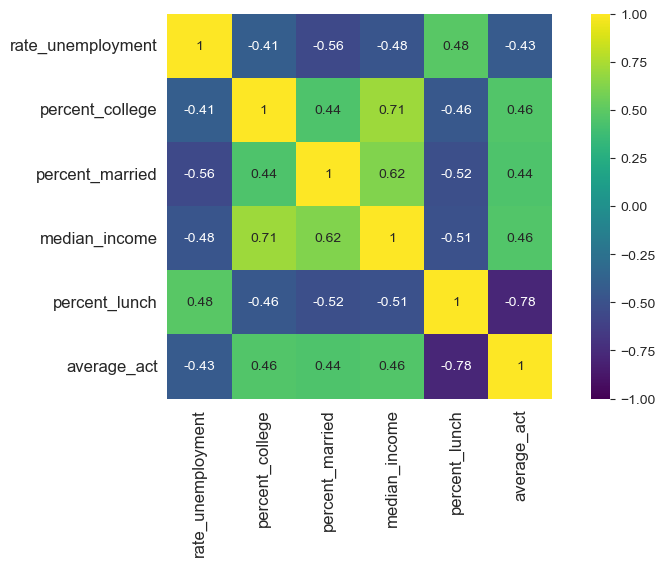

In [56]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ['average_act']].corr() 

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax =1, vmin=-1, square = True, annot = True, cmap='viridis'   
)

plt.tick_params(labelsize=12)


Make pair plots to explore relationships between the variables

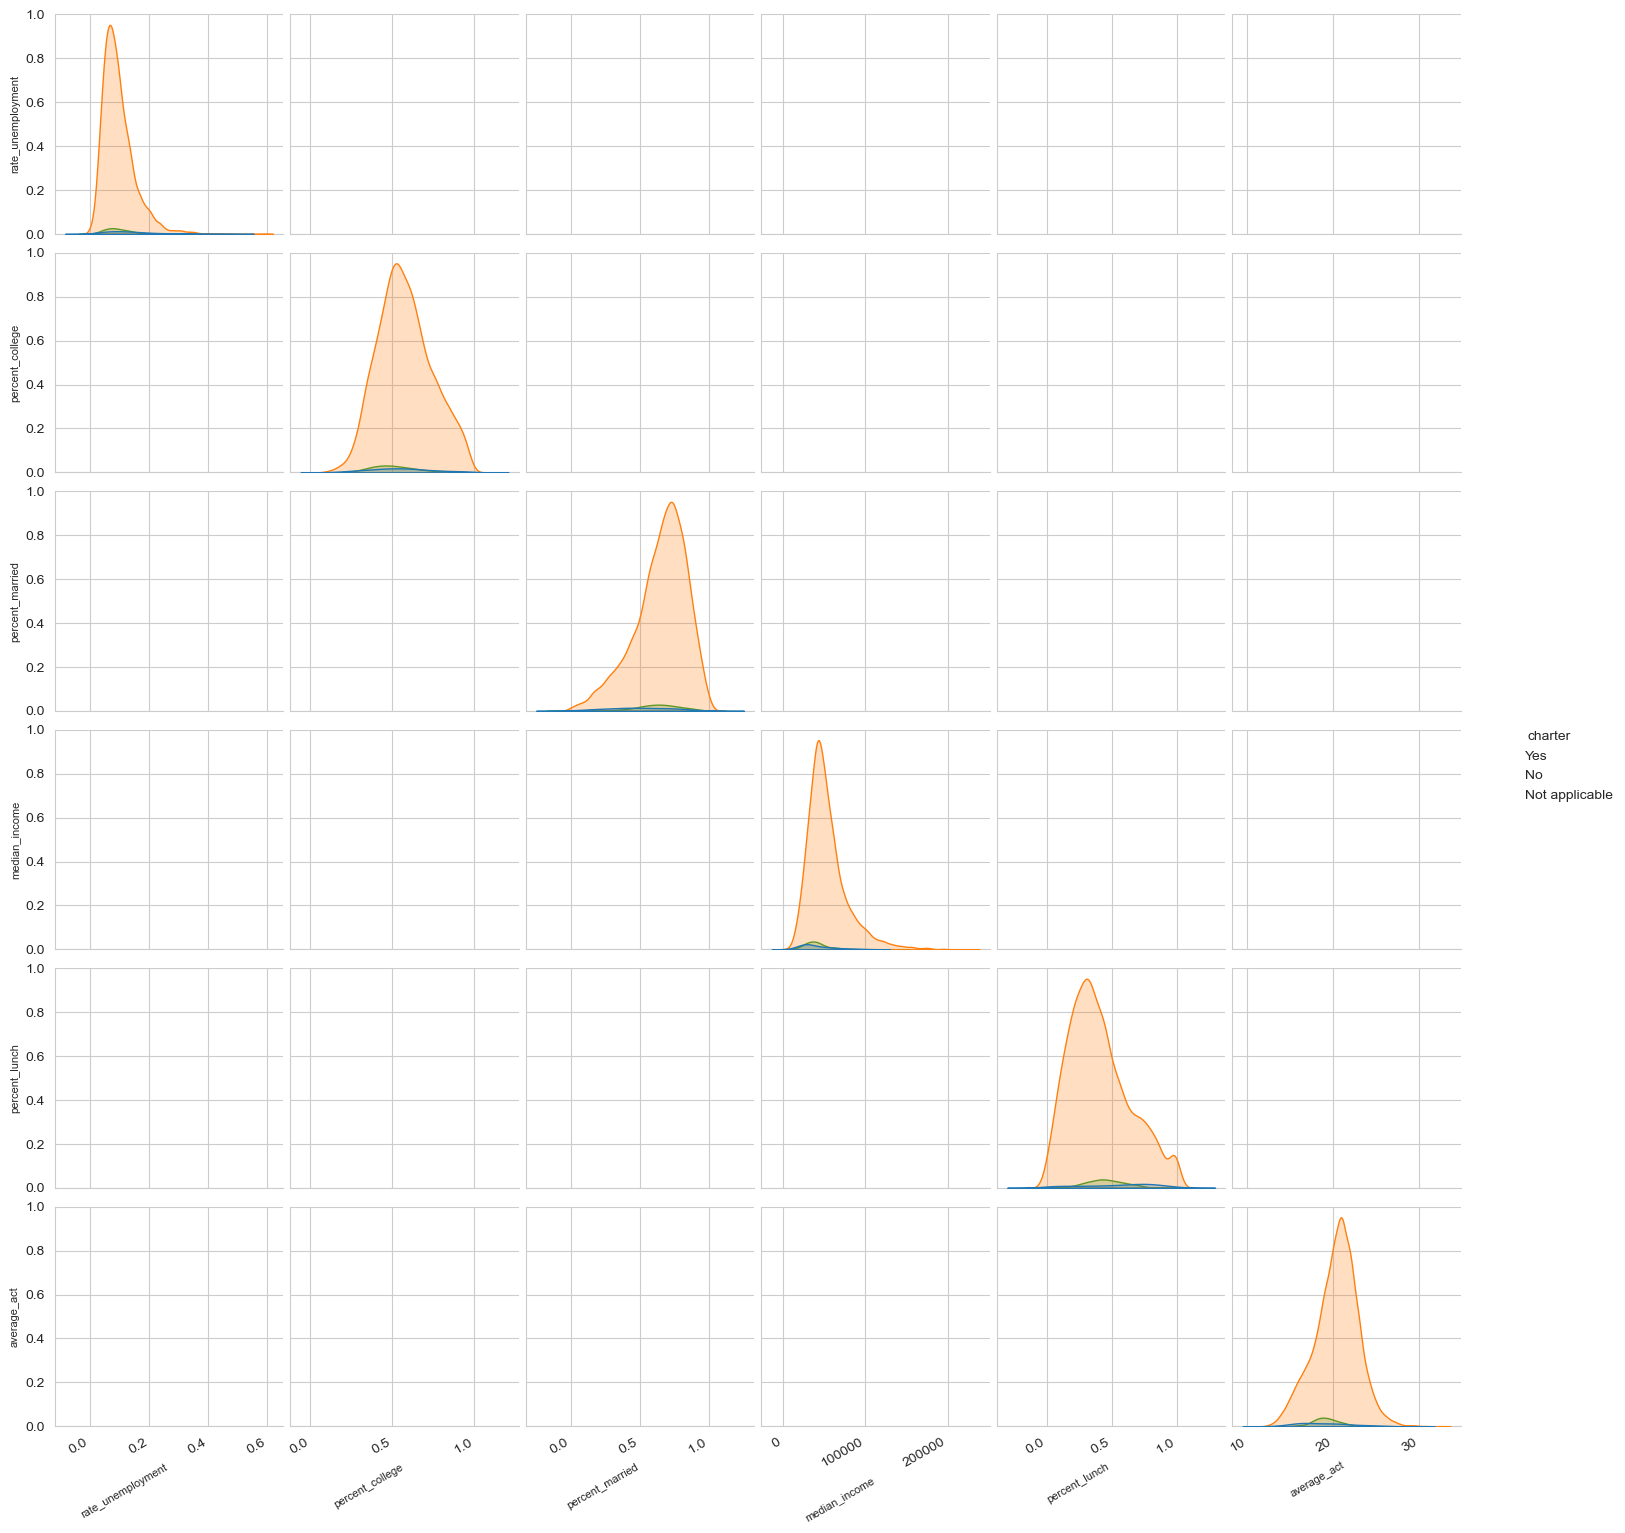

In [61]:
fig = sns.pairplot(
    data = df,
    vars = numerical_predictors + ['average_act'],
    hue = 'charter',
    kind = 'red',
    plot_kws={"scatter_kws": {'alpha': 0.5, "color": 'k', 's':7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income' :
        ax.ticklabel_format(style='sci', axis= 'x', scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation= 30, ha = 'right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    
    plt.setp(ax.get_xticklabels(), rotation= 30, ha='right')

Identify outliers

We can use the interquartile range to identify outliers. THis is also evident in boxplots of the data. Median income is on a very difference scale than the other predictors, so we will make two plots to explore the data

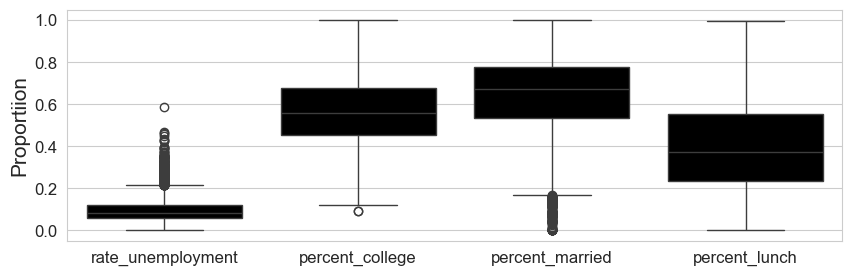

In [62]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data = df[fractions], color='k')

plt.ylabel('Proportiion', fontsize = 15)

plt.tick_params(labelsize = 12)

plt.show()

Look for the median income

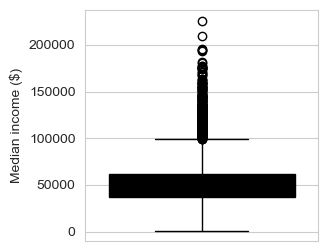

In [63]:
plt.figure(figsize=(3, 3))

sns.boxplot(data =df, y ='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

##### Summary

1. The numerical predictors are related to average_act. The relationships appear roughly linear.
2. THe numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.
3. Some variables have skewed distributions, suggesting that transformations of input variables might be useful.
4. There are outliers in rate_unemployment, precent_collage, precent_married and median_income. None of there are obiouvsly incorrect values; they likely relfect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.
5. The relationships are similar across charter and non-charter schools, but might be significantly different.